<a href="https://colab.research.google.com/github/linhoangce/ml_with_pytorch_and_scikitlearn/blob/main/chapter3_classifiers_with_scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First steps with scikit-learb - training a perceptron

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X[:10], y

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [2]:
print(f"Class labels: {np.unique(y)}")

Class labels: [0 1 2]


In [3]:
## Split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

`train_test_split` already shuffles the training datasets interneally before splitting.
`stratify=y`: stratification means that the `train_test_split` method returns training and testing subsets that have the same proportions of class labels as the input dataset. We can use NumPy's `bincount` function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [4]:
print(f'Labels counts in y: {np.bincount(y)}')
print(f'Labels counts in y_train: {np.bincount(y_train)}')
print(f'Labels counts in y_test: {np.bincount(y_test)}')

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
# Standardize the features using the StandardScaler class
# feature scaling for optimal performance
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

`fit`: `StandardScaler` estimates the parameters, sample means and standard deviation, for each feature dimension from the training data.
`transform`: by calling `transform` method, we then stardardize the training data using those esitmated parameters, sample mean and std.

We used the same scaling parameters to standardize the test dataset so that both the values in the training and test dataset are comparable with one another.

In [6]:
X_train_std[:10], X_test_std[:10]

(array([[-1.33269725, -1.30728421],
        [-1.16537974, -1.30728421],
        [ 0.84243039,  1.44587881],
        [ 1.0655204 ,  1.18367281],
        [-1.44424226, -1.30728421],
        [ 1.0097479 ,  1.57698181],
        [ 1.56747294,  1.18367281],
        [-1.44424226, -1.30728421],
        [ 1.12129291,  0.5281578 ],
        [ 0.45202286,  0.1348488 ]]),
 array([[ 0.89820289,  1.44587881],
        [-1.16537974, -1.04507821],
        [-1.33269725, -1.17618121],
        [ 0.39625036,  0.65926081],
        [ 0.34047786,  0.2659518 ],
        [ 0.11738784,  0.1348488 ],
        [ 1.12129291,  0.79036381],
        [ 0.39625036,  0.3970548 ],
        [ 0.84243039,  0.92146681],
        [-1.38846976, -1.04507821]]))

In [7]:
# train a perceptron model for multiclass classification
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
# Make predictions on the test samples
y_pred = ppn.predict(X_test_std)
print(f'Misclassified examples: {int((y_test != y_pred).sum())}')

Misclassified examples: 1


In [9]:
# Calculate loss
((y_test != y_pred).sum() / len(y_test)).item()

0.022222222222222223

In [10]:
# accuracy
from sklearn.metrics import accuracy_score
print(f"ACcuracy: {accuracy_score(y_test, y_pred):.3f}")

ACcuracy: 0.978


In [11]:
# get accuracy using Perception class `score` function
ppn.score(X_test_std, y_test)

0.9777777777777777

### Visualize the model performance

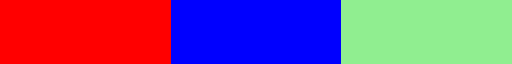

In [14]:
markers = ('o', 's', '^', 'v', '<')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
cmap

In [15]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
X[:,0].min().item(), X[:,0].max().item(), x1_min, x1_max

(1.0, 6.9, np.float64(0.0), np.float64(7.9))

In [16]:
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
X[:,1].min(), X[:,1].max(), x2_min, x2_max

(np.float64(0.1), np.float64(2.5), np.float64(-0.9), np.float64(3.5))

In [17]:
xx1 = np.arange(x1_min, x1_max, 0.02)
xx1

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18,
       2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 ,
       2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62,
       2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84,
       2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.

In [18]:
np.arange(x2_min, x2_max, 0.02)

array([-9.00000000e-01, -8.80000000e-01, -8.60000000e-01, -8.40000000e-01,
       -8.20000000e-01, -8.00000000e-01, -7.80000000e-01, -7.60000000e-01,
       -7.40000000e-01, -7.20000000e-01, -7.00000000e-01, -6.80000000e-01,
       -6.60000000e-01, -6.40000000e-01, -6.20000000e-01, -6.00000000e-01,
       -5.80000000e-01, -5.60000000e-01, -5.40000000e-01, -5.20000000e-01,
       -5.00000000e-01, -4.80000000e-01, -4.60000000e-01, -4.40000000e-01,
       -4.20000000e-01, -4.00000000e-01, -3.80000000e-01, -3.60000000e-01,
       -3.40000000e-01, -3.20000000e-01, -3.00000000e-01, -2.80000000e-01,
       -2.60000000e-01, -2.40000000e-01, -2.20000000e-01, -2.00000000e-01,
       -1.80000000e-01, -1.60000000e-01, -1.40000000e-01, -1.20000000e-01,
       -1.00000000e-01, -8.00000000e-02, -6.00000000e-02, -4.00000000e-02,
       -2.00000000e-02,  7.77156117e-16,  2.00000000e-02,  4.00000000e-02,
        6.00000000e-02,  8.00000000e-02,  1.00000000e-01,  1.20000000e-01,
        1.40000000e-01,  

In [19]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
xx1, xx2

(array([[0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        ...,
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
        [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88]]),
 array([[-0.9 , -0.9 , -0.9 , ..., -0.9 , -0.9 , -0.9 ],
        [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
        [-0.86, -0.86, -0.86, ..., -0.86, -0.86, -0.86],
        ...,
        [ 3.44,  3.44,  3.44, ...,  3.44,  3.44,  3.44],
        [ 3.46,  3.46,  3.46, ...,  3.46,  3.46,  3.46],
        [ 3.48,  3.48,  3.48, ...,  3.48,  3.48,  3.48]]))

In [20]:
xx1.ravel(), xx2.ravel()

(array([0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88]),
 array([-0.9 , -0.9 , -0.9 , ...,  3.48,  3.48,  3.48]))

In [21]:
np.array([xx1.ravel(), xx2.ravel()])

array([[ 0.  ,  0.02,  0.04, ...,  7.84,  7.86,  7.88],
       [-0.9 , -0.9 , -0.9 , ...,  3.48,  3.48,  3.48]])

In [22]:
np.array([xx1.ravel(), xx2.ravel()]).T

array([[ 0.  , -0.9 ],
       [ 0.02, -0.9 ],
       [ 0.04, -0.9 ],
       ...,
       [ 7.84,  3.48],
       [ 7.86,  3.48],
       [ 7.88,  3.48]])

In [23]:
ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

array([1, 1, 1, ..., 2, 2, 2])

In [24]:
xx1.shape

(220, 395)

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, c1 in enumerate(np.unique(y)):
    plt.scatter(x=X[y == c1, 0],
                y=X[y == c1, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {c1}',
                edgecolor='black')

  # highligh test examples
  if test_idx:
    # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='none', edgecolor='black', alpha=1.,
                linewidth=1, marker='o',
                s=100, label='Test set')

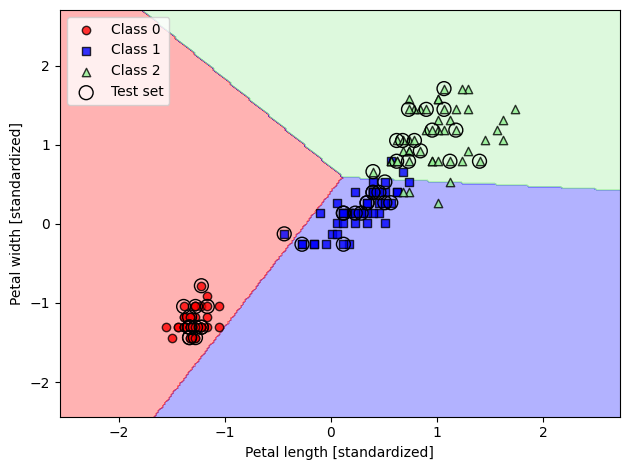

In [26]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Modeling class probablities via logistic regression

### Logistic regression and conditional probablities

In [27]:
# plot sigmoid function in range -7 to 7
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1. / (1. + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
sigma_z

array([9.11051194e-04, 1.00677082e-03, 1.11253603e-03, 1.22939862e-03,
       1.35851995e-03, 1.50118226e-03, 1.65880108e-03, 1.83293894e-03,
       2.02532039e-03, 2.23784852e-03, 2.47262316e-03, 2.73196076e-03,
       3.01841632e-03, 3.33480731e-03, 3.68423990e-03, 4.07013772e-03,
       4.49627316e-03, 4.96680165e-03, 5.48629890e-03, 6.05980149e-03,
       6.69285092e-03, 7.39154134e-03, 8.16257115e-03, 9.01329865e-03,
       9.95180187e-03, 1.09869426e-02, 1.21284350e-02, 1.33869178e-02,
       1.47740317e-02, 1.63024994e-02, 1.79862100e-02, 1.98403057e-02,
       2.18812709e-02, 2.41270214e-02, 2.65969936e-02, 2.93122308e-02,
       3.22954647e-02, 3.55711893e-02, 3.91657228e-02, 4.31072549e-02,
       4.74258732e-02, 5.21535631e-02, 5.73241759e-02, 6.29733561e-02,
       6.91384203e-02, 7.58581800e-02, 8.31726965e-02, 9.11229610e-02,
       9.97504891e-02, 1.09096821e-01, 1.19202922e-01, 1.30108474e-01,
       1.41851065e-01, 1.54465265e-01, 1.67981615e-01, 1.82425524e-01,
      

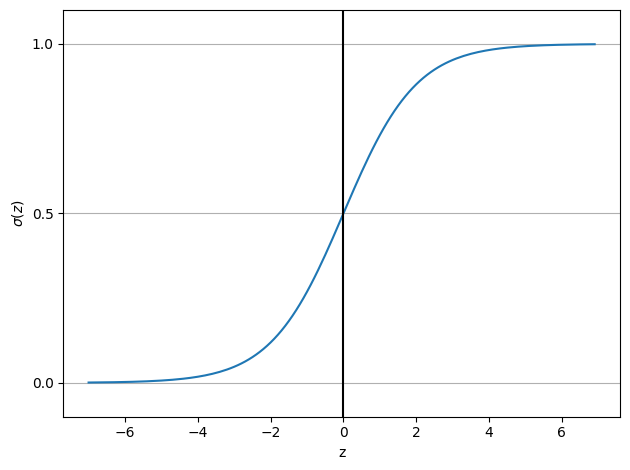

In [28]:
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


### Learning the model weights via the logistic loss function

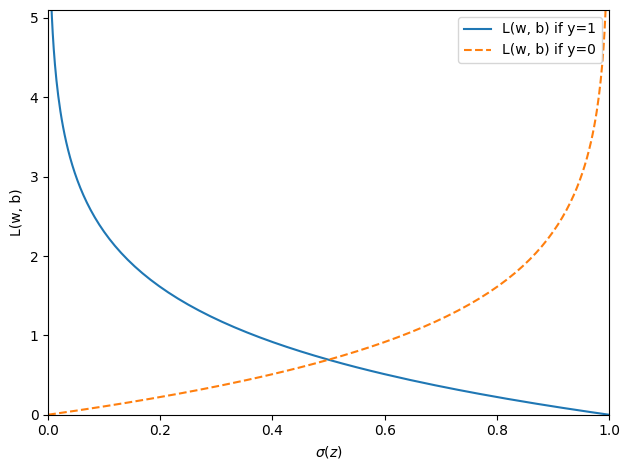

In [29]:
# create a plot that illustrates the loss of classifying a single training examples
def loss_1(z):
  return - np.log(sigmoid(z))

def loss_0(z):
  return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [30]:
sigmoid(-10).item(), sigmoid(10).item()

(4.5397868702434395e-05, 0.9999546021312976)

We can see that the loss approaches 0 (continous line) if we correctly predict that an example belongs to class 1. Similarly, we can see on the y axis that the loss also approaches 0 if we correctly predict y=0 (dashed line). However, if the prediction is wrong, the loss goes toward infinity. The main point is that we penalize wrong predictions with an increasingly larger loss.

### Converting an Adaline implementation into an algorithm for logistic regression

In [31]:
class LogisticRegressionGD:
  """Gradient descent-based logistic regression classifier.

  Parameters
  ------------
  eta : float
    Learniing rate (between 0. and 1.)
  n_iter : int
    Passes over the training dataset.
  random_state : int
    Random number generator seeed for random weight initialization.

  Attributes
  --------------
  w_ : 1d-array
    Weights after training.
  b_ :  Scalar
    Bias unit after fitting.
  losses_ : lost
    Mean squared error loss function values in each epoch.
  """
  def __init__(self, eta=0.01, n_iter=50,
               random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """Fit training data.

    Parameters
    ------------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_Examples is the number of examples
      and n_features is the number of features.
    y : array-like, shape = [n_examples]
      Target values

    Returns
    ---------
    self : Instances of LogisticRegressionGD

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0., scale=0.01, size=X.shape[1])
    self.b_ = np.float64(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (-y.dot(np.log(output)) -
       ((1 - y).dot(np.log(1 - output)))
              / X.shape[0])
      self.losses_.append(loss)

    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def activation(self, z):
    """Compute logistic sigmoid activation"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) > 0.5, 1, 0)


In [32]:
X_train_std[(y_train) == 0 | (y_train == 1)]

array([[-1.33269725, -1.30728421],
       [-1.16537974, -1.30728421],
       [-1.44424226, -1.30728421],
       [-1.44424226, -1.30728421],
       [ 0.45202286,  0.1348488 ],
       [-0.27301968, -0.2584602 ],
       [ 0.06161534,  0.2659518 ],
       [-1.38846976, -1.30728421],
       [ 0.50779537,  0.0037458 ],
       [ 0.11738784,  0.1348488 ],
       [-1.05383474, -1.30728421],
       [-0.16147468, -0.2584602 ],
       [ 0.06161534,  0.0037458 ],
       [-1.22115225, -1.30728421],
       [ 0.39625036,  0.3970548 ],
       [ 0.39625036,  0.1348488 ],
       [ 0.00584283, -0.1273572 ],
       [ 0.50779537,  0.2659518 ],
       [ 0.17316034,  0.1348488 ],
       [-1.27692475, -1.04507821],
       [ 0.22893285,  0.3970548 ],
       [-1.22115225, -1.30728421],
       [-1.33269725, -1.30728421],
       [-1.05383474, -1.04507821],
       [-1.55578727, -1.30728421],
       [ 0.61934037,  0.3970548 ],
       [-1.27692475, -1.30728421],
       [-1.50001477, -1.43838721],
       [ 0.50779537,

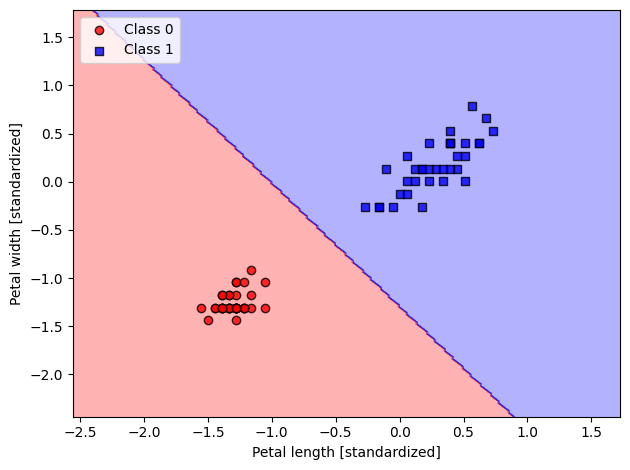

In [33]:
# fit logistic regression model
# this model only works for binary classification tasks
# we only consider setosa and versicolor flowers (class 0 and 1)
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | y_train == 1]
lrgd = LogisticRegressionGD(eta=0.3,
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Training a logistic regression model with scikit-learn

we will use
the sklearn.linear_model.LogisticRegression class as well as the familiar fit method to train the
model on all three classes in the standardized flower training dataset. Also, we set multi_class='ovr'
for illustration purposes. As an exercise for the reader, you may want to compare the results with
multi_class='multinomial'. Note that the multinomial setting is now the default choice in scikitlearn’s LogisticRegression class and recommended in practice for mutually exclusive classes, such
as those found in the Iris dataset. Here, “mutually exclusive” means that each training example can
only belong to a single class (in contrast to multilabel classification, where a training example can be
a member of multiple classes).


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


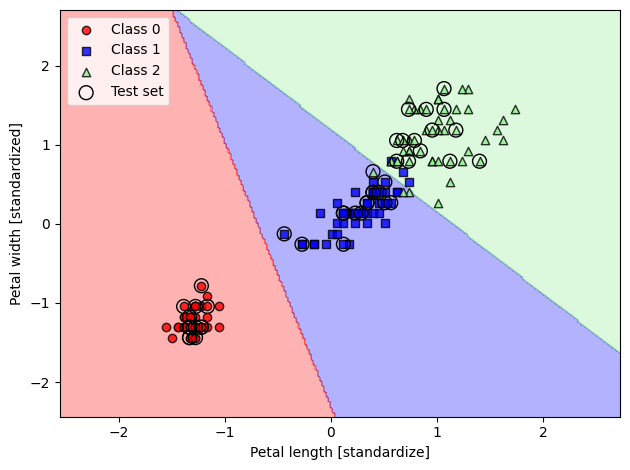

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs',
                        multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardize]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
X_test_std[:3, :]

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121]])

In [36]:
# predict the probabilities of the first three examples in test dataset
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [37]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [38]:
# get argmax
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [39]:
# get labels using scikit-learn `predict` method
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [40]:
# Predict class label of a single flower example
# scikit-learn expects a two-dimensional arrays as data input
# so, we have to convert a single row slice into two-dimensional array
X_test_std[0, :], X_test_std[0, :].reshape(1, -1)

(array([0.89820289, 1.44587881]), array([[0.89820289, 1.44587881]]))

In [41]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### Tackling overfitting via regularization

Via the regularization parameter, 𝜆𝜆, we can then control how closely we fit the training data, while
keeping the weights small. By increasing the value of 𝜆𝜆, we increase the regularization strength. Please
note that the bias unit, which is essentially an intercept term or negative threshold, as we learned in
Chapter 2, is usually not regularized.

The parameter, C, that is implemented for the LogisticRegression class in scikit-learn comes from
a convention in support vector machines, which will be the topic of the next section. The term C is
inversely proportional to the regularization parameter, 𝜆𝜆. Consequently, decreasing the value of the
inverse regularization parameter, C, means that we are increasing the regularization strength, which
we can visualize by plotting the L2 regularization path for the two weight coefficients:

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

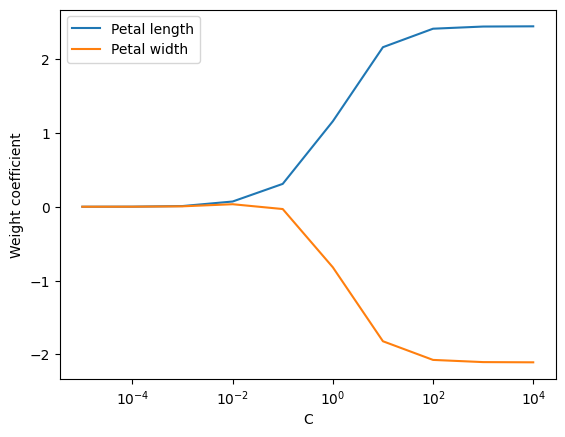

In [42]:
weights, params = [], []

# fit 10 logistic regression model with
# dufferent values for the inver-regularization parameter C
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.0 ** c,
                          multi_class='ovr')
  lr.fit(X_train_std, y_train)
  # for illustration purpose, only collect weight coefficient
  # of class 1 veruse all clasifiers
  weights.append(lr.coef_[1])
  params.append(10.0 ** c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1],
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

As we can see, the weight coefficients shrink if we decrease parameter C, that is, if we increase the regularization strength.

Increase the regularization strength can reduce overfitting, but we have to be careful when adjusting it. If regularization strength is too high and the weights coefficients approaches zero, the model can perform very poorly due to underfitting.

## Maximum margin classification with support vector machines

Another powerful and widely used learning algorith is the **support vector machine**, which can be considered an extension of the perceptron. Using the perceptron algorithm, we minimize misclassification error. However, in SVMs, our optimization objective is to maximize the margin. The margine is defined as the distance between the separating hyperplane (decision boundary) and the training examples that are closet to this hyperplane, which are the so-called **support vectors**.

### Maximum margin intuition

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error, whereas models with small margins are more prone to overfitting.

### Dealing with a nonlinearly seperable case using slack variables

The motivation for introducing slack variables was that the linear constraints in the SVM optimization objective need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate loss penalization.

The use of the slack variable, in turn, introduces the variable, which is commonly referred to as C in SVM contexts. We can consider C as a hyperparamter for controlling the penalty for misclassification.

Large values of C correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for C. We can then use the C parameter to control the width of th margin and therefore tune the bias-variance tradeoff.

Decrease the value of C increases the bias (underfitting) and lower the variance (overfitting) of the model.

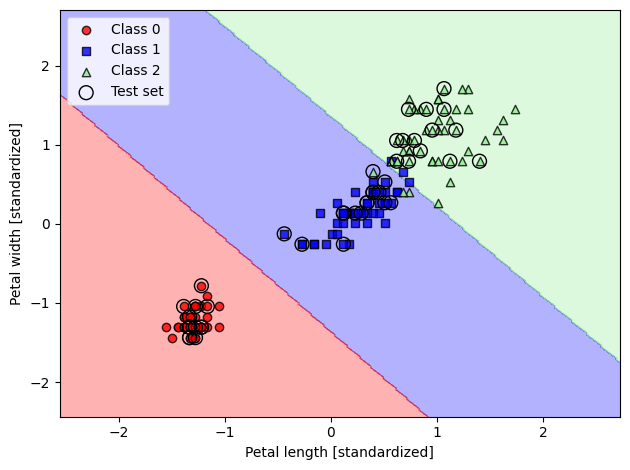

In [43]:
# train a SVM model to classify flowers from Iris set
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
# SGDClassifier, which supports online learning via `partial-fit`
# initialize SGD version of the perceptron (loss='perceptron')
# logistic regression (loss='log')
# SVM with default parameters (loss='hinge')
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
ppn

SGDClassifier(loss='perceptron')

In [45]:
lr = SGDClassifier(loss='log')
lr

SGDClassifier(loss='log')

In [46]:
svm = SGDClassifier(loss='hinge')
svm

SGDClassifier()

## Solving nonlinear problems using a kernel SVM

### Kernel methods for linearly inseparable data

We will create a simple dataset that has the form of an XOR gate uisng th `logical_or` function from NumPy, wehere 100 examples will be assigned the class label 1, and 100 examples will be assigned the class label -1:

In [47]:
X_xor = np.random.randn(200, 2)
X_xor.shape

(200, 2)

In [48]:
y_xor = np.logical_xor(X_xor[:, 0] > 0,
               X_xor[:, 1] > 0)
y_xor

array([False,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False,  True,

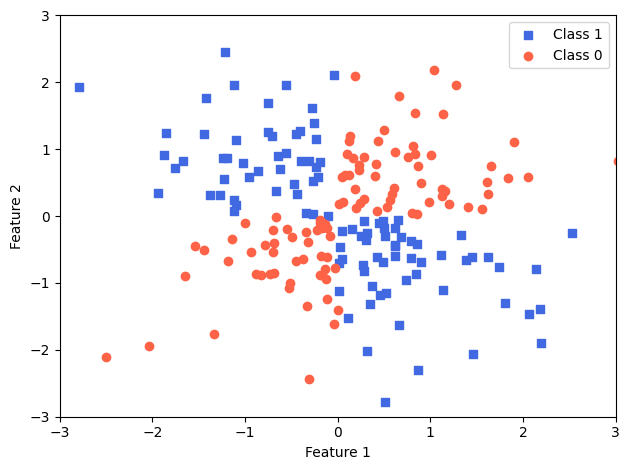

In [49]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The basic idea behind **kernel methods** for dealing with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function, where the data becomes linearly separable. We can transform a two-dimensional dataset into a new three-dimensional feature space, where the classes become separable.

### Using the kernel trick to find separating hyperplanes in a high-dimensional space



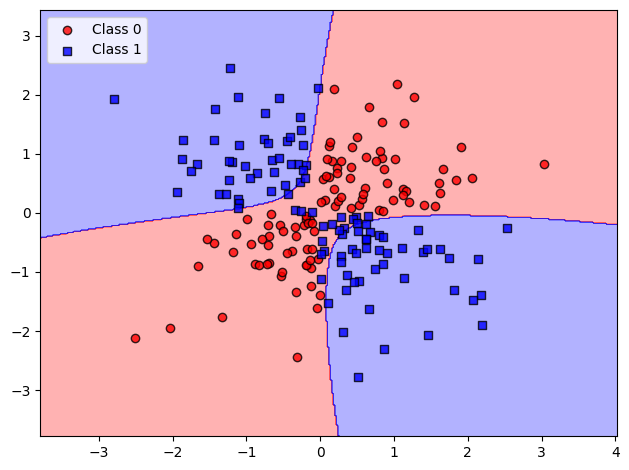

In [50]:
# replace `kernel='linear'` with `kernel='rbf'`
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X=X_xor,
                      y=y_xor,
                      classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The gamma parameter set to `gamma=0.1` can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for gamma, we increase the influence or reach of the training examples, which lead sto a tighter and bumpier decision boundary. To get a better understanding of gamme, let's apply an RBF kernel SVM to our Iris flower dataset:

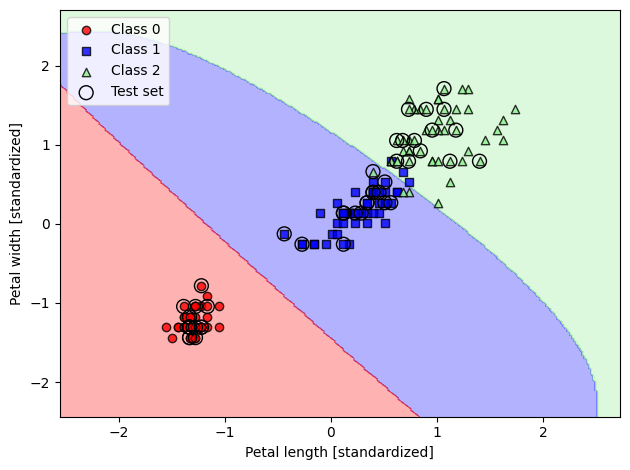

In [51]:
svm = SVC(kernel='rbf',
          random_state=1,
          gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

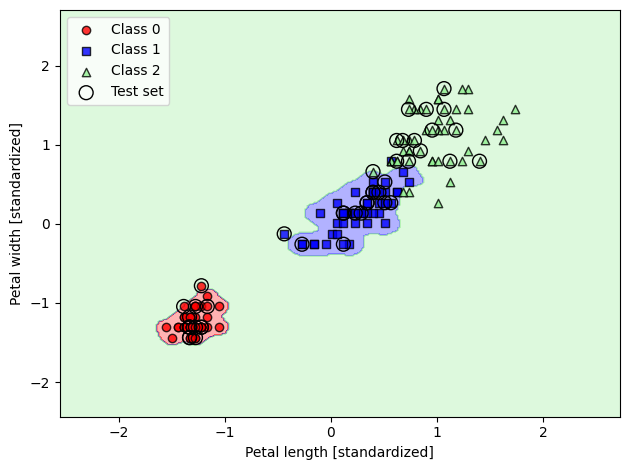

In [52]:
# increase the value of gamme to see the effect on decision boundary
svm = SVC(kernel='rbf',
          random_state=1,
          gamma=100., C=1.)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Decision tree learning

### Maximize IG

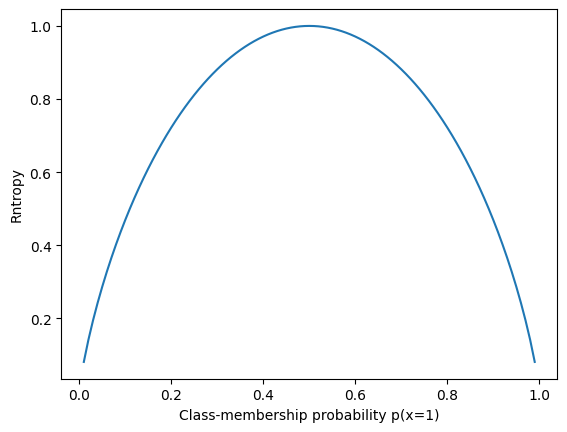

In [53]:
# Visualize the entropy values for different class distributions
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Rntropy')
plt.xlabel('Class-membership probability p(x=1)')
plt.plot(x, ent)
plt.show()

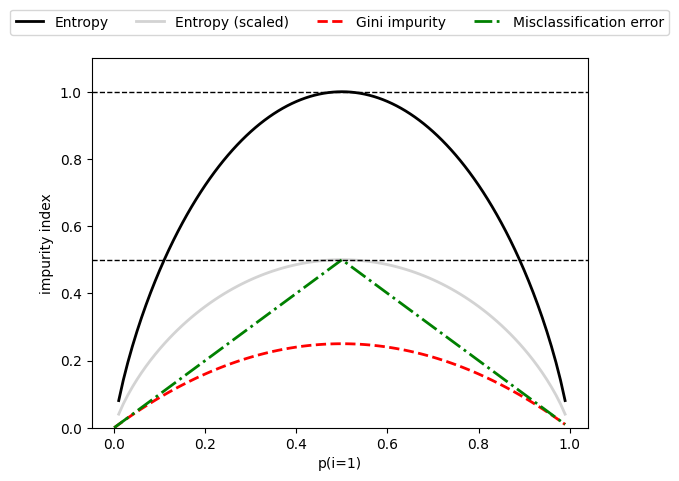

In [54]:
# visual comparison of three different impurity criteria
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
  return p*(1 - 1) + (1 - p)*(1 - (1-p))

def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
  return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)',
                          'Gini impurity',
                          'Misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red',
                          'green', 'cyan']):
  line = ax.plot(x, i, label=lab,
                 linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

### Building a decision tree

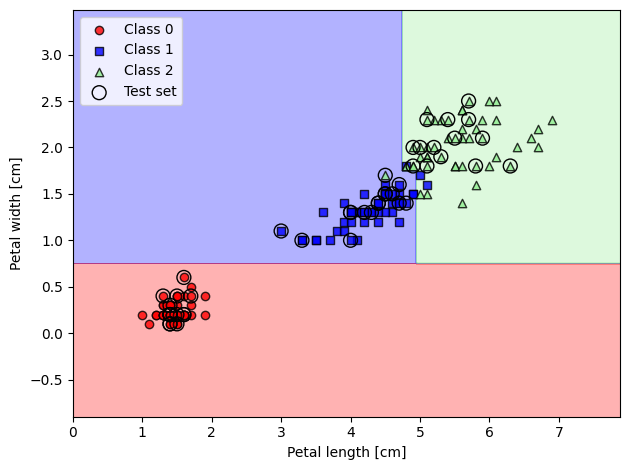

In [55]:
# train a decision tree with a max depth of 4,
# using Gini impurity
# feature scaling is not required for DT algorithm
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined,
                      y=y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

A nice feature in scikit-learn is that it allows us to readily visualize the decision tree model after training:

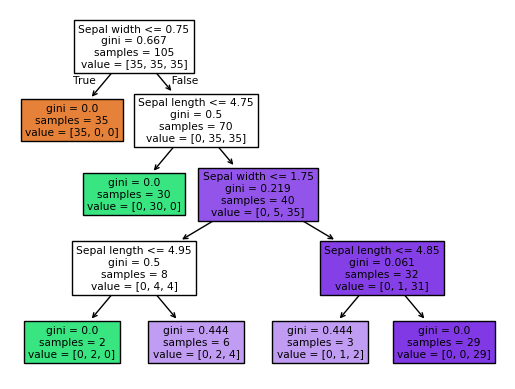

In [56]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()

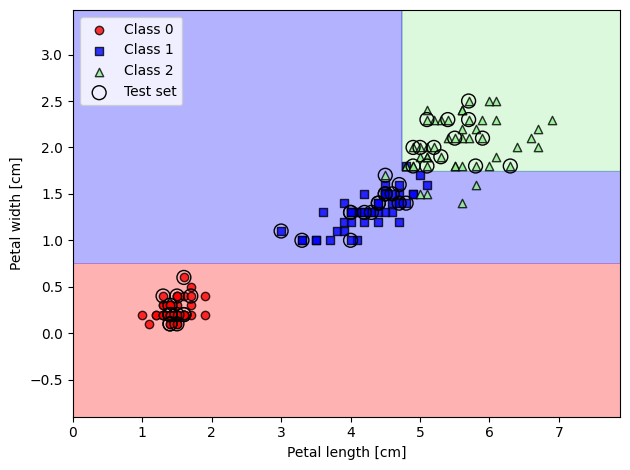

In [57]:
# build a new decision tree with max depth of 3
from sklearn.tree import DecisionTreeClassifier

tree_model1 = DecisionTreeClassifier(criterion='gini',
                                     max_depth=3)
tree_model1.fit(X_train, y_train)

X_combined1 = np.vstack((X_train, X_test))
y_combined1 = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined1,
                      y=y_combined1,
                      classifier=tree_model1,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

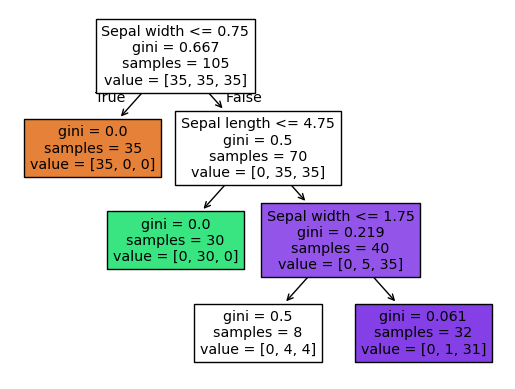

In [58]:
# Visualize tree
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']

tree.plot_tree(tree_model1,
               feature_names=feature_names,
               filled=True)
plt.show()

### Combining multiple decision trees via random forests

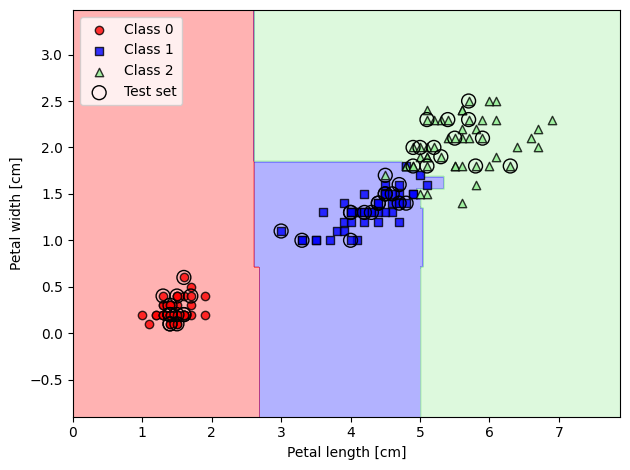

In [59]:
# implement a random forest tree model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, # train 25 decision trees
                                random_state=1,
                                n_jobs=2) # use 2 cpu cores
forest.fit(X_train, y_train)

plot_decision_regions(X=X_combined,
                      y=y_combined,
                      classifier=forest,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## K-nearest neighbors - a lazy learning algorithm

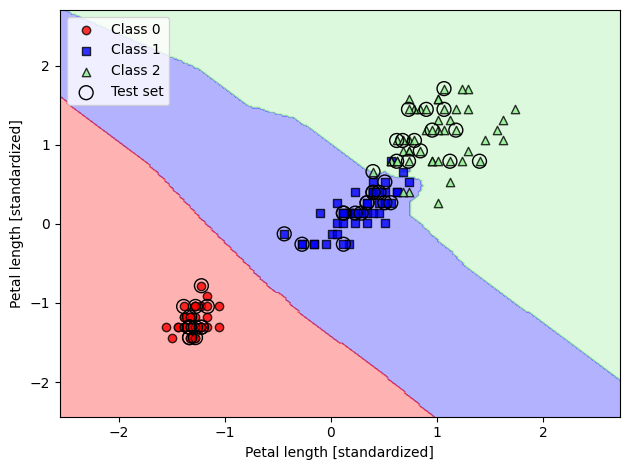

In [63]:
# implement a KNN model using Euclidean distance metric
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=knn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
